In [1]:
from pprint import pprint

import pandas as pd

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import pickle

In [2]:
df = pd.read_csv('phishing.csv.gz', compression='gzip')

df.head(10)

,url,phishing
0,http://www.subalipack.com/contact/images/sampl...,1
1,http://fasc.maximecapellot-gypsyjazz-ensemble....,1
2,http://theotheragency.com/confirmer/confirmer-...,1
3,http://aaalandscaping.com/components/com_smart...,1
4,http://paypal.com.confirm-key-21107316126168.s...,1
5,http://lcthomasdeiriarte.edu.co/plugins/system...,1
6,http://livetoshare.org/open/service-apps.com.c...,1
7,http://www.i-m.co/reactivate/webupgrade/\n,1
8,http://manuelfernando.co/sparkatse/index.htm\n,1
9,http://www.bladesmithnews.com/confirmation-pay...,1


In [3]:
df.phishing.value_counts()

1    20000
0    20000
Name: phishing, dtype: int64

In [4]:
pprint(df.url[df.phishing == 1].sample(20, random_state=1).tolist())

['http://dothan.com.co/gold/austspark/index.htm\n',
 'http://78.142.63.63/%7Enetsysco/process/fc1d9c7ea4773b7ff90925c2902cb5f2\n',
 'http://verify95.5gbfree.com/coverme2010/\n',
 'http://www.racom.com/uploads/productscat/bookmark/ii.php?.rand=13vqcr8bp0gud&cbcxt=mai&email=abuse@tradinghouse.ca\n',
 'http://www.cleanenergytci.com/components/update.logon.l3an7lofamerica/2342343234532534546347677898765432876543345687656543876/\n',
 'http://209.148.89.163/-/santander.co.uk/weblegn/AccountLogin.php\n',
 'http://senevi.com/confirmation/\n',
 'http://www.hellenkeller.cl/tmp/new/noticias/Modulo_de_Atualizacao_Bradesco/index2.php?id=PSO1AM04L3Q6PSBNVJ82QUCO0L5GBSY2KM2U9BYUEO14HCRDVZEMTRB3DGJO9HPT4ROC4M8HA8LRJD5FCJ27AD0NTSC3A3VDUJQX6XFG519OED4RW6Y8J8VC19EAAAO5UF21CHGHIP7W4AO1GM8ZU4BUBQ6L2UQVARVM\n',
 'http://internet-sicherheit.co/de/konflikt/src%3Dde/AZ00276ZZ75/we%3Dhs_0_2/sicherheit/konto_verifizieren/verifizierung.php\n',
 'http://alen.co/docs/cleaner\n',
 'http://rattanhouse.co/Atualizacao_

In [5]:
df['url2'] = df.url.str.rstrip()

pprint(df.url2[df.phishing == 1].sample(20, random_state=1).tolist())

['http://dothan.com.co/gold/austspark/index.htm',
 'http://78.142.63.63/%7Enetsysco/process/fc1d9c7ea4773b7ff90925c2902cb5f2',
 'http://verify95.5gbfree.com/coverme2010/',
 'http://www.racom.com/uploads/productscat/bookmark/ii.php?.rand=13vqcr8bp0gud&cbcxt=mai&email=abuse@tradinghouse.ca',
 'http://www.cleanenergytci.com/components/update.logon.l3an7lofamerica/2342343234532534546347677898765432876543345687656543876/',
 'http://209.148.89.163/-/santander.co.uk/weblegn/AccountLogin.php',
 'http://senevi.com/confirmation/',
 'http://www.hellenkeller.cl/tmp/new/noticias/Modulo_de_Atualizacao_Bradesco/index2.php?id=PSO1AM04L3Q6PSBNVJ82QUCO0L5GBSY2KM2U9BYUEO14HCRDVZEMTRB3DGJO9HPT4ROC4M8HA8LRJD5FCJ27AD0NTSC3A3VDUJQX6XFG519OED4RW6Y8J8VC19EAAAO5UF21CHGHIP7W4AO1GM8ZU4BUBQ6L2UQVARVM',
 'http://internet-sicherheit.co/de/konflikt/src%3Dde/AZ00276ZZ75/we%3Dhs_0_2/sicherheit/konto_verifizieren/verifizierung.php',
 'http://alen.co/docs/cleaner',
 'http://rattanhouse.co/Atualizacao_Bradesco/cadastro201

In [6]:
urls = list(df.url2)

max_len = 0

for url in urls:
  if (len(url) > max_len):
    max_len = len(url)

max_len

2080

In [7]:
numChars = []

for url in urls:
  numChars.append(len(url))

sum(numChars) / len(numChars)

92.717225

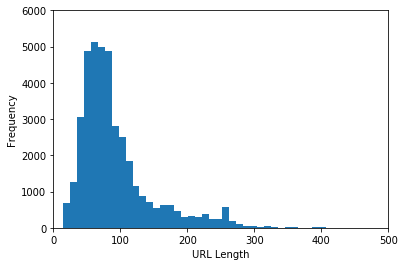

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(numChars, 200)
plt.xlabel('URL Length')
plt.ylabel('Frequency')
plt.axis([0, 500, 0, 6000])
plt.show()

In [10]:
charsList = [list(url) for url in urls]


from collections import defaultdict

frequency = defaultdict(int)

for chars in charsList:
  for char in chars:
    frequency[char] += 1

len(frequency)

98

In [11]:
frequency['h']

97304

In [12]:
frequency2 = defaultdict(int)

for char, count in frequency.items():
  if (count < 5):
    frequency2[char] = count

len(frequency2)

6

In [13]:
pprint(frequency2)

defaultdict(<class 'int'>, {'£': 4, '¢': 4, 'ä': 1, '>': 1, '\\': 1, 'ü': 1})


In [14]:
dictionary = defaultdict(int)

id = 0

for char, count in frequency.items():
  dictionary[char] = id
  id += 1

corpus = [[dictionary[char] for char in chars] for chars in charsList]

In [15]:
Y = list(df.phishing)

from sklearn.model_selection import train_test_split

corpus_train, corpus_test, Y_train, Y_test = train_test_split(corpus, Y, test_size=0.2, random_state=42)

In [16]:
import pickle

pickle.dump(corpus_train, open( "corpus_train.pkl", "wb" ))
pickle.dump(corpus_test, open( "corpus_test.pkl", "wb" ))
pickle.dump(Y_train, open( "Y_train.pkl", "wb" ))
pickle.dump(Y_test, open( "Y_test.pkl", "wb" ))

In [17]:
import tensorflow as tf

import tflearn

tflearn.init_graph(num_cores=3)

intra_op_parallelism_threads: 3
inter_op_parallelism_threads: 3
gpu_options {
}
allow_soft_placement: true

In [53]:
from tflearn.data_utils import to_categorical, pad_sequences

trainX_ = pad_sequences(corpus_train, maxlen=200, value=98)
testX_ = pad_sequences(corpus_test, maxlen=200, value=98)

trainY_ = to_categorical(Y_train, nb_classes=2)
testY_ = to_categorical(Y_test, nb_classes=2)

trainX, trainY = tflearn.data_utils.shuffle(trainX_, trainY_)
testX, testY = tflearn.data_utils.shuffle(testX_, testY_)

In [19]:
from tflearn.layers.conv import conv_1d, global_max_pool
from tflearn.layers.merge_ops import merge

net = tflearn.input_data(shape=[None, 200])
net = tflearn.embedding(net, input_dim=99, output_dim=32)
branch2 = conv_1d(net, 128, 2, padding='valid', activation='relu', regularizer="L2")
branch3 = conv_1d(net, 128, 3, padding='valid', activation='relu', regularizer="L2")
branch4 = conv_1d(net, 128, 4, padding='valid', activation='relu', regularizer="L2")
branch5 = conv_1d(net, 128, 5, padding='valid', activation='relu', regularizer="L2")
net = merge([branch2, branch3, branch4, branch5], mode='concat', axis=1)
net = tf.expand_dims(net, 2)
net = global_max_pool(net)
net = tflearn.dropout(net, 0.8)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net, optimizer='adam', learning_rate=0.001, loss='categorical_crossentropy')

model = tflearn.DNN(net, tensorboard_verbose=0)

In [20]:
for i in range(10):
  model.fit(trainX, trainY, validation_set=(testX, testY), shuffle=True, show_metric=True, n_epoch=1, batch_size=32)
  model.save("cnn%s.tfl"%(i+1))

Training Step: 9999  | total loss: 0.02153 | time: 423.310s
| Adam | epoch: 010 | loss: 0.02153 - acc: 0.9882 -- iter: 31968/32000
Training Step: 10000  | total loss: 0.01953 | time: 433.710s
| Adam | epoch: 010 | loss: 0.01953 - acc: 0.9894 | val_loss: 0.01864 - val_acc: 0.9949 -- iter: 32000/32000
--
INFO:tensorflow:/work/phishing-urls/cnn10.tfl is not in all_model_checkpoint_paths. Manually adding it.


In [54]:
accuracy = model.evaluate(testX_, testY_)

print(accuracy)

[0.99487499999999995]


In [55]:
predictions = model.predict(testX_)

In [56]:
import numpy as np

predict_labels = np.zeros(len(predictions))

for idx, pred in enumerate(predictions):
    if (pred[0] < pred[1]):
        predict_labels[idx] = 1

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predict_labels)

print('true negatives: %s'%cm[0,0])
print('false negatives: %s'%cm[1,0])
print('true positives: %s'%cm[1,1])
print('false positives: %s'%cm[0,1])

fpr = '{percent:.3%}'.format(percent= cm[0,1] / (cm[1,1] + cm[0,1]))
fnr = '{percent:.3%}'.format(percent= cm[1,0] / (cm[0,0] + cm[1,0]))
                             
print('false postive rate: %s'%fpr)
print('false negative rate: %s'%fnr)

true negatives: 3976
false negatives: 31
true positives: 3983
false positives: 10
false postive rate: 0.250%
false negative rate: 0.774%


In [58]:
from sklearn.metrics import precision_score

print('precision score: %s'%precision_score(Y_test, predict_labels))


from sklearn.metrics import recall_score

print('recall score: %s'%recall_score(Y_test, predict_labels))


from sklearn.metrics import f1_score

print('f1 score: %s'%f1_score(Y_test, predict_labels))

precision score: 0.99749561733
recall score: 0.992277030394
f1 score: 0.994879480455


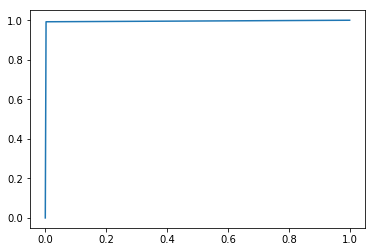

In [59]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predict_labels, pos_label=1)

plt.plot(fpr,tpr)
plt.show() 

In [64]:
# url = 'http://www.nyyg.com/Bradesco/5W9SQ394.html'

url = 'http://www.google.com/index.html'

corpus_url = [dictionary[char] for char in list(url)]

X_url = pad_sequences([corpus_url], maxlen=200, value=98)

pred_url = model.predict(X_url)

pred_url[0]

array([ 0.85115427,  0.1488457 ], dtype=float32)